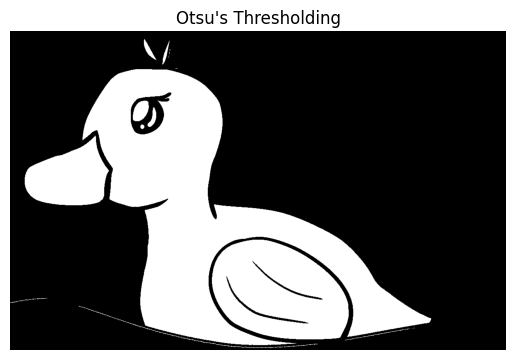

In [ ]:
# Otsu's
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("duck.png", 0)

# Apply Otsu's thresholding
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
plt.imshow(thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')
plt.show()


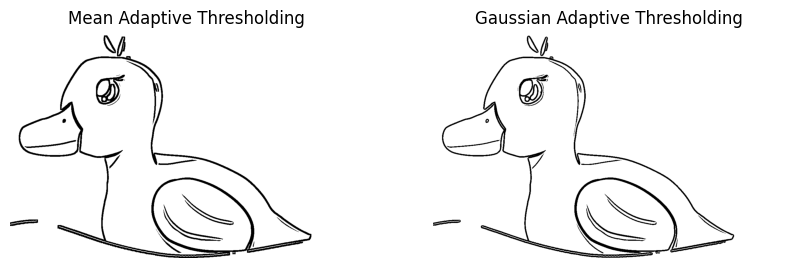

In [ ]:
# Adaptive Thresholding
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("duck.png", 0)

# Apply mean adaptive thresholding
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Gaussian adaptive thresholding
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh1, cmap='gray')
plt.title('Mean Adaptive Thresholding')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh2, cmap='gray')
plt.title('Gaussian Adaptive Thresholding')
plt.axis('off')

plt.show()


<ipython-input-4-dd227aff1937>:29: RuntimeWarning: overflow encountered in scalar subtract
  if 0 <= nx < rows and 0 <= ny < cols and abs(image[x, y] - image[nx, ny]) <= threshold:


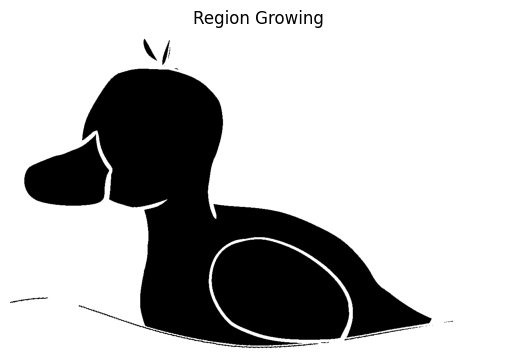

In [ ]:
# Region Growing

import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed_point, threshold):
    """
    Performs region growing on an image.

    Args:
        image: The input image.
        seed_point: The coordinates of the seed point.
        threshold: The similarity threshold.

    Returns:
        A binary mask representing the segmented region.
    """
    rows, cols = image.shape
    mask = np.zeros_like(image, dtype=np.uint8)
    queue = [seed_point]

    while queue:
        x, y = queue.pop(0)
        if mask[x, y] == 0:
            mask[x, y] = 255
            neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
            for nx, ny in neighbors:
                if 0 <= nx < rows and 0 <= ny < cols and abs(image[x, y] - image[nx, ny]) <= threshold:
                    queue.append((nx, ny))

    return mask

# Load the image
image = cv2.imread("duck.png", 0)
seed_point = (100, 100)
threshold = 10
mask = region_growing(image, seed_point, threshold)

# Display the result
plt.imshow(mask, cmap='gray')
plt.title("Region Growing")
plt.axis('off')
plt.show()


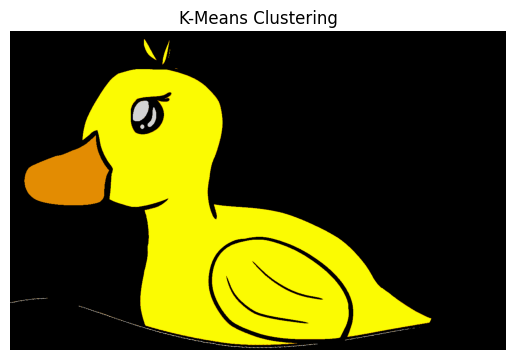

In [ ]:
# K-Means Clustering
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image and reshape it
img = cv2.imread("duck.png")
img_reshaped = img.reshape((-1, 3))

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(img_reshaped)
labels = kmeans.labels_
centers = np.uint8(kmeans.cluster_centers_)

# Reshape the labels and create the segmented image
labels = labels.reshape(img.shape[:2])
segmented_image = centers[labels]

# Display the segmented image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("K-Means Clustering")
plt.axis('off')
plt.show()


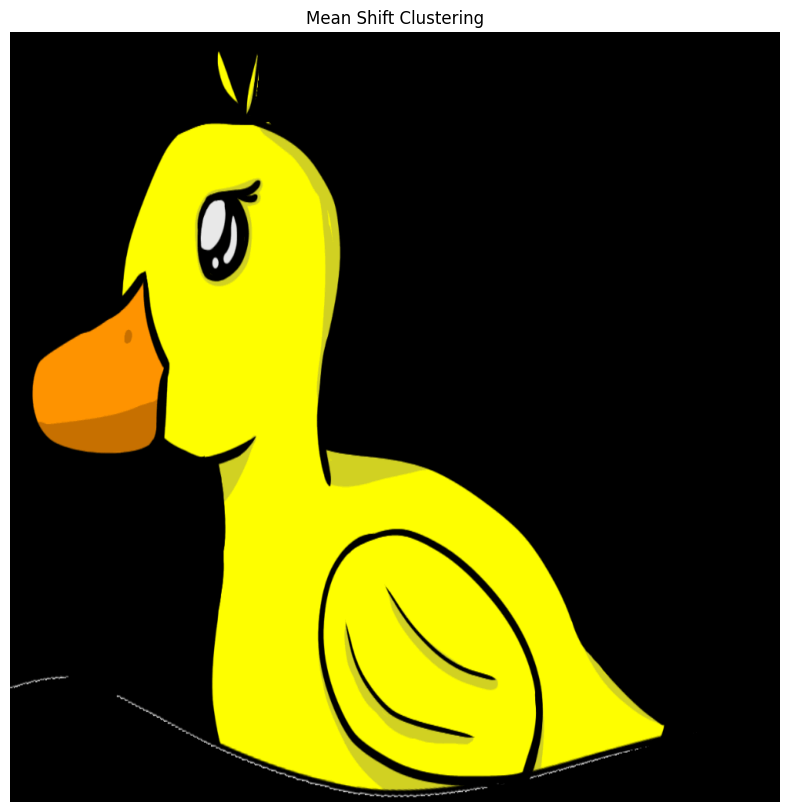

In [2]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# Load and resize the image for efficiency
img = cv2.imread("duck.png")
img_small = cv2.resize(img, (1000,1000))  # Resize to 150x150 for faster computation
img_reshaped = img_small.reshape((-1, 3))  # Flatten the image into a 2D array

# Estimate the bandwidth (key parameter for Mean Shift)
bandwidth = estimate_bandwidth(img_reshaped, quantile=0.1, n_samples=1000)

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(img_reshaped)
labels = ms.labels_
centers = np.uint8(ms.cluster_centers_)

# Reshape the labels to match the original image dimensions
labels_reshaped = labels.reshape(img_small.shape[:2])

# Recreate the segmented image using the cluster centers
segmented_image = centers[labels_reshaped]

# Display the segmented image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Mean Shift Clustering")
plt.axis('off')
plt.show()
